In [6]:
import numpy as np 
import pandas as pd 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re

import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os

In [7]:
data = pd.read_csv('TamilFakeAndReal.csv')

In [8]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))
data['removed_punc'] = data['English'].apply(lambda x: remove_punct(x))
data.head()

# Converting to lower case

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

# Remove tokens of length less than 3

def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Unnamed: 0,English,Tamil,Is Fake,removed_punc,tokens,filtered_tokens
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,There is no precaution Scolded Chief Minister ...,"[there, is, no, precaution, scolded, chief, mi...","[there, precaution, scolded, chief, minister, ..."
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,34 people have corona in Saidapet Govt Trainin...,"[34, people, have, corona, in, saidapet, govt,...","[people, have, corona, saidapet, govt, trainin..."
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,Hanuman Jayanti at Dhanwandri Peedam 100008 Va...,"[hanuman, jayanti, at, dhanwandri, peedam, 100...","[hanuman, jayanti, dhanwandri, peedam, 100008,..."
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,Happy New Year 2022 Do you know which country ...,"[happy, new, year, 2022, do, you, know, which,...","[happy, year, 2022, know, which, country, welc..."
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,Devotees thronging Sabarimala Allowed to visit...,"[devotees, thronging, sabarimala, allowed, to,...","[devotees, thronging, sabarimala, allowed, vis..."


In [9]:
# Remove stopwords

nltk.download('stopwords')
nltk.download('wordnet')
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

# Apply lemmatization on tokens

def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


,Unnamed: 0,English,Tamil,Is Fake,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,There is no precaution Scolded Chief Minister ...,"[there, is, no, precaution, scolded, chief, mi...","[there, precaution, scolded, chief, minister, ...","[precaution, scolded, chief, minister, stalin,...","[precaution, scolded, chief, minister, stalin,...",precaution scolded chief minister stalin diffi...
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,34 people have corona in Saidapet Govt Trainin...,"[34, people, have, corona, in, saidapet, govt,...","[people, have, corona, saidapet, govt, trainin...","[people, corona, saidapet, govt, training, cen...","[people, corona, saidapet, govt, training, cen...",people corona saidapet govt training center he...
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,Hanuman Jayanti at Dhanwandri Peedam 100008 Va...,"[hanuman, jayanti, at, dhanwandri, peedam, 100...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...",hanuman jayanti dhanwandri peedam 100008 vada ...
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,Happy New Year 2022 Do you know which country ...,"[happy, new, year, 2022, do, you, know, which,...","[happy, year, 2022, know, which, country, welc...","[happy, year, 2022, know, country, welcomes, y...","[happy, year, 2022, know, country, welcome, ye...",happy year 2022 know country welcome year firs...
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,Devotees thronging Sabarimala Allowed to visit...,"[devotees, thronging, sabarimala, allowed, to,...","[devotees, thronging, sabarimala, allowed, vis...","[devotees, thronging, sabarimala, allowed, vis...","[devotee, thronging, sabarimala, allowed, visi...",devotee thronging sabarimala allowed visit ayy...


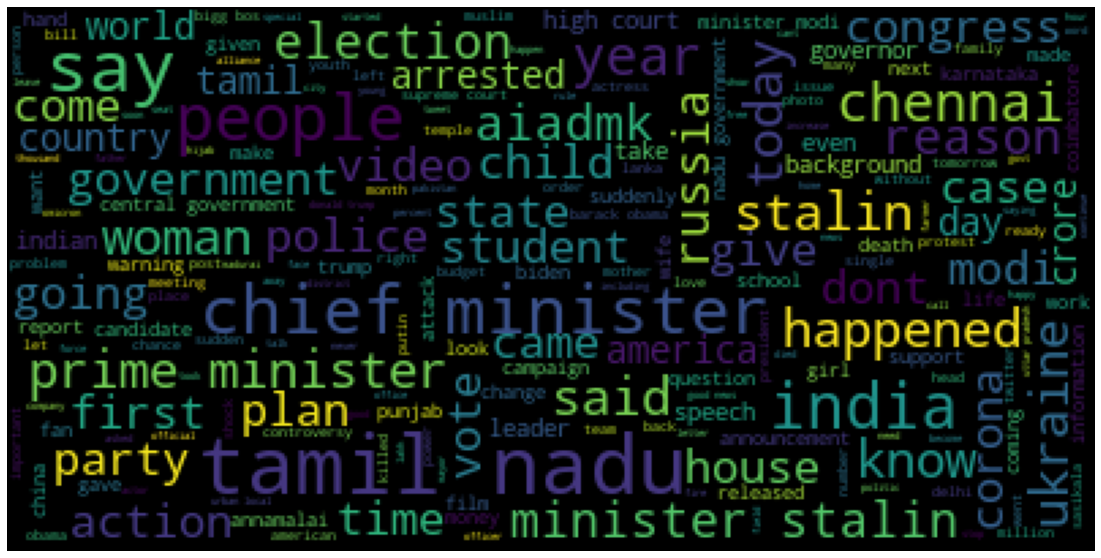

In [10]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
corpus = data['clean_text']
df = data['Is Fake']

In [1]:
data.to_csv('TamilFakeAndRealNew.csv')

NameError: name 'data' is not defined

In [12]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.values

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

classifier = {'Logistic Regression':LogisticRegression(),'SVM':svm.SVC(kernel='linear'),'Naive Bayes':GaussianNB(),
              'KNN':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier()}

for i in classifier:
    classifier[i].fit(X_train, y_train)
    ypred = classifier[i].predict(X_test)
    print('Accuracy Score w.r.t ' + i + ' :' + str(accuracy_score(y_test,ypred)))

Accuracy Score w.r.t Logistic Regression :0.9234466186062479
Accuracy Score w.r.t SVM :0.9227600411946447
Accuracy Score w.r.t Naive Bayes :0.6333676622039135
Accuracy Score w.r.t KNN :0.8551321661517336
Accuracy Score w.r.t Decision Tree :0.8688637143837967
Accuracy Score w.r.t Random Forest :0.9028492962581531


In [17]:
import pickle

In [18]:
models = ['Alpha Engine', 'Beta Engine', 'Gamma Engine', 'Lambda Engine', 'Sigma Engine', 'Omega Engine']

In [20]:
for i, val in enumerate(classifier):
    pickle.dump(classifier[val], open(models[i]+'.pkl', 'wb'))

In [21]:
import joblib

In [22]:
for i, val in enumerate(classifier):
    joblib.dump(classifier[val], models[i]+'.joblib',  compress=3)

In [4]:
loadedModels = {}
for i in models:
    loadedModels[i] = joblib.load(i+'.joblib')

In [15]:
loadedModels['Alpha Engine']

LogisticRegression()

In [23]:
ypred = loadedModels['Alpha Engine'].predict(X_test)

In [24]:
accuracy_score(y_test, ypred)

0.9234466186062479

In [29]:
news = [GoogleTranslator(source='tamil', target='en').translate("துபாய் தீ விபத்து: உயிரிழந்தவர்களின் குடும்பத்துக்கு முதல்வர் ஸ்டாலின் தலா ரூ.10 லட்சம் நிதியுதவி !").lower()]
for i in list(loadedModels.keys()):
    print(i, loadedModels[i].predict(cv.transform(news).toarray()))

Alpha Engine [0]
Beta Engine [0]
Gamma Engine [0]
Lambda Engine [0]
Sigma Engine [0]
Omega Engine [0]


In [26]:
from deep_translator import GoogleTranslator

In [54]:
msg = GoogleTranslator(source='tamil', target='en').translate("தமிழகத்தில் படுவேகமாக உயரும் கொரோனா.. 500 தாண்டிய தினசரி பாதிப்பு.. திருப்பூரில் ஒருவர் பலி! ஷாக்").lower()

In [5]:
!pip install joblib